# Notes about the SAS's Course
## Statistics 1: Introduction to ANOVA, Regression, and Logistic Regression

This notes is based in the course materials, some codes and images are property . I made a Jupyter Notebook using JupiterLab with SAS University Edition. 

## 0. Script to setup the sesion
Run this script in the begining the each session to access the data in the correct way. 

In [6]:
ODS select none;

%let homefolder=/folders/myfolders/ECST142;
%let Cursofolder=/folders/myfolders/Statistics1_ANOVA_Regression_LogisticRegression/;

libname STAT1 "&homefolder";
libname Curso "&Cursofolder";



options fmtsearch=(stat1.myfmts);

proc format library=stat1.myfmts;
run;

/* create macro variables to hold the names of the interval and */
/* categorical variables used in the demo and practice programs */

%let interval=Gr_Liv_Area Basement_Area Garage_Area Deck_Porch_Area 
         Lot_Area Age_Sold Bedroom_AbvGr Total_Bathroom;

%let categorical=House_Style2 Overall_Qual2 Overall_Cond2 Fireplaces 
         Season_Sold Garage_Type_2 Foundation_2 Heating_QC 
         Masonry_Veneer Lot_Shape_2 Central_Air;

## 5. Model Post-Fitting for Inference

* to verify these assumptions and diagnose problems that you encounter in linear regression. 
* to examine residuals.
* identify outliers that are numerically distant from the bulk of the data.
* identify influential observations that unduly affect the regression model.
* to diagnose collinearity to avoid inflated standard errors and parameter instability in the model.

### Examining Residuals
...

#### Demo: Examining Residual Plots Using PROC REG

we use PROC REG to create residual plots and other diagnostic plots. We use these plots to check our model assumptions and to check for outliers. First, to assess our model overall, we'll produce the eight default plots for fit diagnostics.


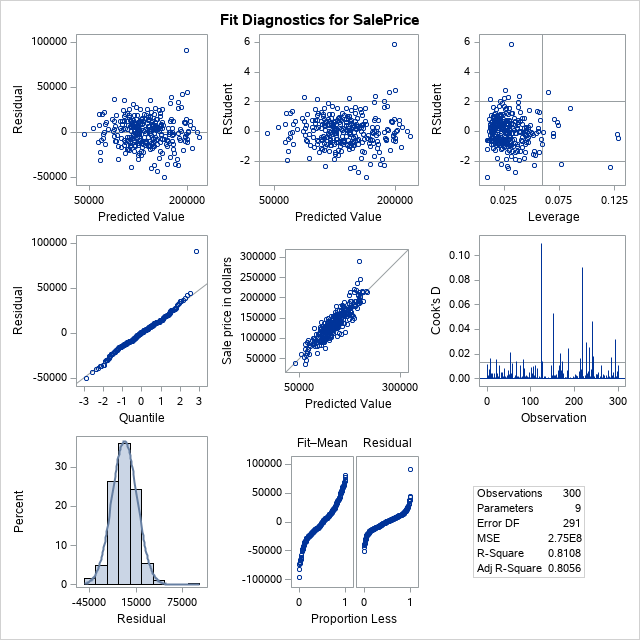
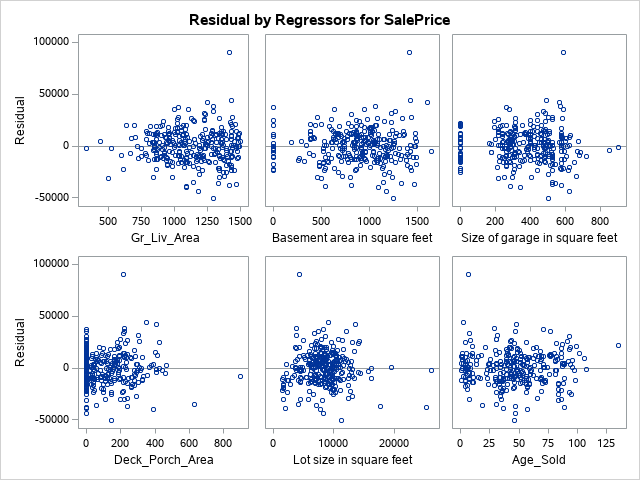
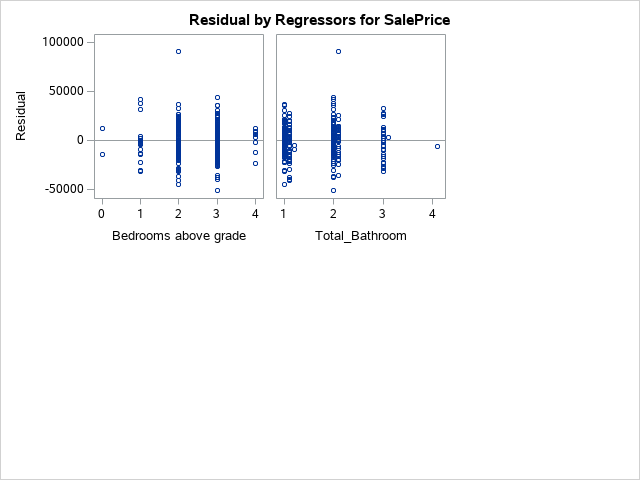

In [3]:
%let interval=Gr_Liv_Area Basement_Area Garage_Area Deck_Porch_Area 
         Lot_Area Age_Sold Bedroom_AbvGr Total_Bathroom ;

ods graphics on;
proc reg data=STAT1.ameshousing3;
    CONTINUOUS: model SalePrice 
                  = &interval;
    title 'SalePrice Model - Plots of Diagnostic Statistics';
run;
quit;

#### Practice: Using the Linear Regression Task to Examine Residuals
Run a regression on PctBodyFat2 in the bodyfat2 data set to examine residuals.
1. Use the Linear Regression task to run a regression model of PctBodyFat2 on Abdomen, Weight, Wrist, and Forearm. Create plots of the residuals by the four regressors and by the predicted values, and a normal Q-Q plot.
2. Do the residual plots indicate any problems with the constant variance assumption?
3. Are there any outliers indicated by the evidence in any of the residual plots?
4. Does the Q-Q plot indicate any problems with the normality assumption?


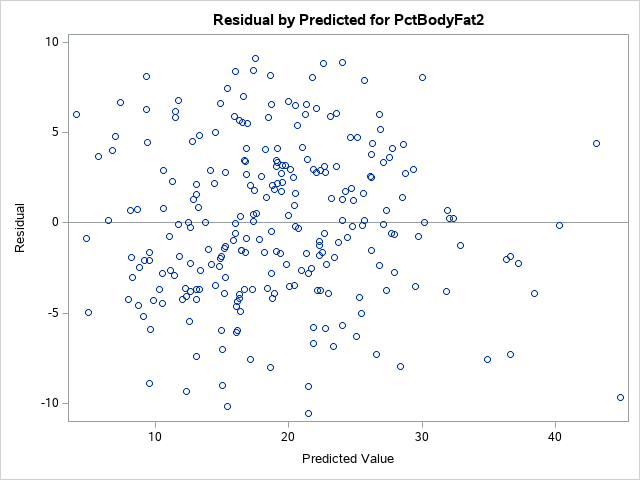
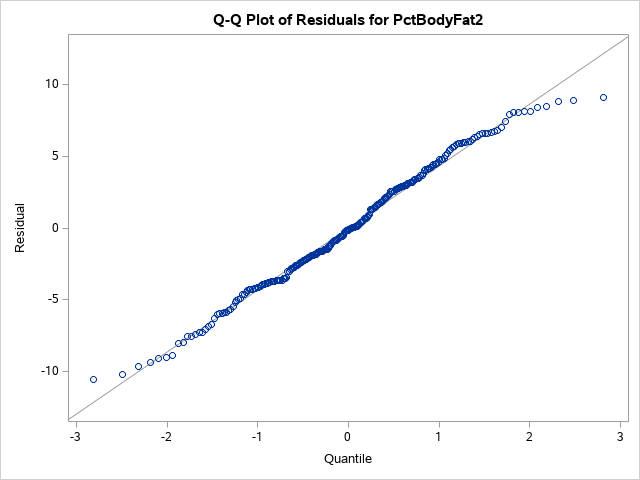
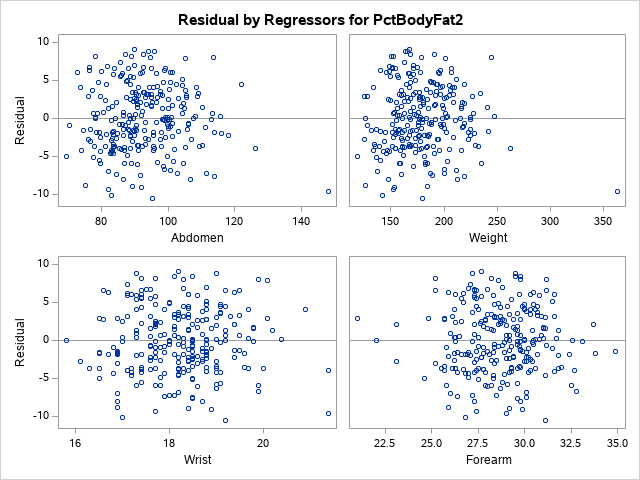

In [4]:
ods graphics / imagemap=on;

proc reg data=STAT1.BodyFat2 
         plots(only)=(QQ RESIDUALBYPREDICTED RESIDUALS);
   FORWARD: model PctBodyFat2 = Abdomen Weight Wrist Forearm;
   id Case;
   title 'FORWARD Model - Plots of Diagnostic Statistics';
run;
quit;

2. Do the residual plots indicate any problems with the constant variance assumption?: *It doesn't appear that the data violate the assumption of constant variance. Also, the residuals show nice random scatter and indicate no problem with model specification.*

3. Are there any outliers indicated by the evidence in any of the residual plots?: *There are a few outliers for Wrist and Forearm, and one clear outlier in both Abdomen and Weight.*

4. Does the Q-Q plot indicate any problems with the normality assumption?: *The normality assumption seems to be met.*

### Influential Observations

* The presence of influential observations or outliers can reveal problems with your model.

#### Checking for Outliers with STUDENT Residuals
...


#### Detecting Influential Observations with DFBETAS

* To help identify which parameter the observation might be influencing most, you can use DFBETAS.
* Sometimes, first use Cook's D to determine who is influential, and then use DFBETAS to determine which specific predictor is being influenced by that observation.
* Large DFBETAS indicate observations that are influential in estimating a given parameter. For DFBETAS, the general cutoff value is 2.

#### Demo: Looking for Influential Observations Using PROC GLMSELECT and PROC REG
1. We select a model by stepwise selection, PROC GLMSELECT. 
2. We use PROC REG to generate influence statistics and plots for the selected model and save the plot data to temporary output data sets.
3. We'll reference these data sets in the second part of the demonstration.


* automatically creates the macro variable _GLSIND, which stores a list of effects selected by PROC GLMSELECT. You can then reference the list as &_GLSIND in subsequent statements.
* ODS SELECT NONE, which suppresses the output.
* Cook's D is a measure of the simultaneous change in all parameter estimates when an observation is deleted. 


In [8]:
%let interval=Gr_Liv_Area Basement_Area Garage_Area Deck_Porch_Area 
         Lot_Area Age_Sold Bedroom_AbvGr Total_Bathroom ;

ods select none;
proc glmselect data=STAT1.ameshousing3 plots=all;
	STEPWISE: model SalePrice = &interval / selection=stepwise details=steps select=SL slentry=0.05 slstay=0.05;
	title "Stepwise Model Selection for SalePrice - SL 0.05";
run;
quit;
ods select all;

In [9]:
%put &_glsind; /*PROC GLMSELECT automatically saves the list of the chosen model effects as the _GLSIND macro variable*/


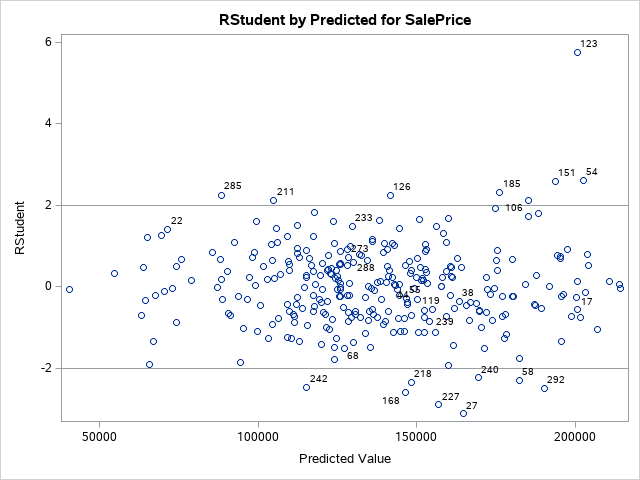
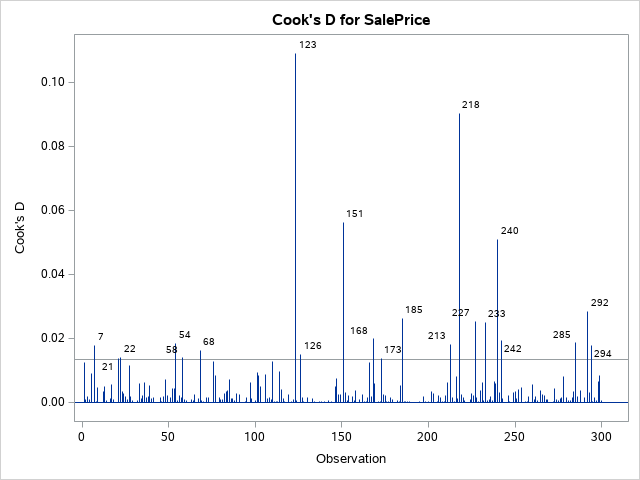
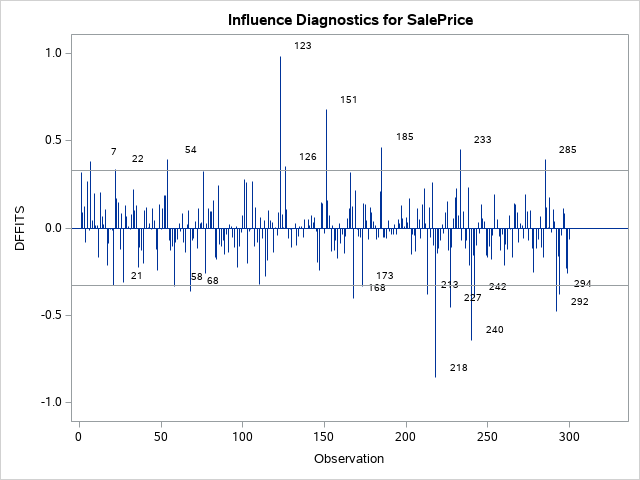
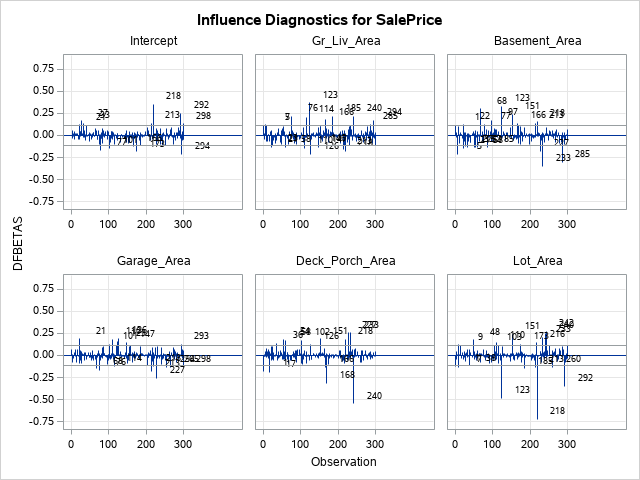
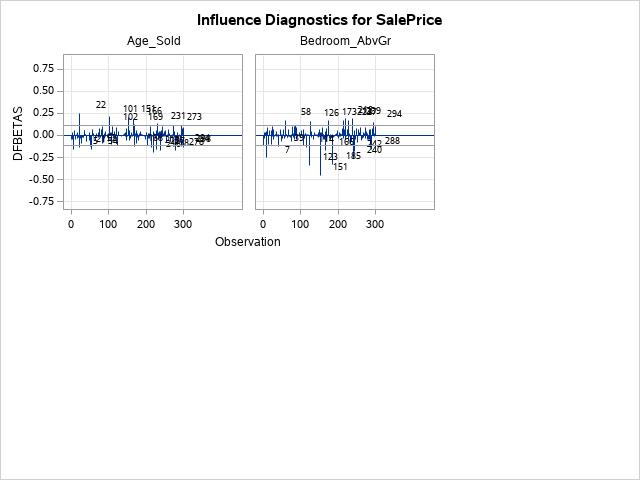

In [10]:
ods graphics on;
ods output RSTUDENTBYPREDICTED=Rstud 
           COOKSDPLOT=Cook
           DFFITSPLOT=Dffits 
           DFBETASPANEL=Dfbs;
           
proc reg data=STAT1.ameshousing3 
         plots(only label)=
              (RSTUDENTBYPREDICTED 
               COOKSD 
               DFFITS 
               DFBETAS);
    SigLimit: model SalePrice = &_GLSIND; 
    title 'SigLimit Model - Plots of Diagnostic Statistics';
run;
quit;